In [4]:
import pandas as pd
data=pd.read_csv(r"final_data.csv")
print(data.describe())

       eicosenoic    palmitic  palmitoleic     stearic       oleic  \
count  494.000000  494.000000   494.000000  494.000000  494.000000   
mean     0.004742    0.002043     0.008903   -0.004258   -0.000978   
std      1.001937    0.997630     1.008828    1.000162    1.001865   
min     -3.680002   -2.084448    -2.079525   -2.436099   -2.133513   
25%     -0.815601   -0.761120    -0.660176   -0.780429   -0.867052   
50%     -0.109068   -0.294894    -0.123676    0.008128    0.193928   
75%      0.754962    0.816513     0.501109    0.940005    0.836822   
max      3.049721    2.907465     3.978174    2.625059    2.024956   

         linoleic   linolenic   arachidic       class  
count  494.000000  494.000000  494.000000  494.000000  
mean     0.023150    0.011963    0.018273    0.866397  
std      1.002386    1.002079    1.002686    0.829455  
min     -2.582859   -2.785591   -1.110012    0.000000  
25%     -0.430602   -0.398998   -1.039226    0.000000  
50%      0.047678    0.159061    

In [5]:

data= data.iloc[:, :-1]
data.head()

,eicosenoic,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic
0,-0.942188,-0.954203,-0.069347,1.217049,-1.222068,0.286817,0.064073,0.872009
1,-0.865647,-0.991878,-0.123676,0.943603,-0.778552,-0.111749,0.111567,0.872009
2,-1.907782,-1.349789,0.473945,1.912659,-1.722549,-0.111749,0.206556,0.872009
3,-1.583955,-1.293277,0.310957,1.526476,-1.437722,1.402803,0.918972,1.296728
4,-1.083494,-1.104903,0.827084,1.092319,-1.222068,1.402803,1.013961,2.075379


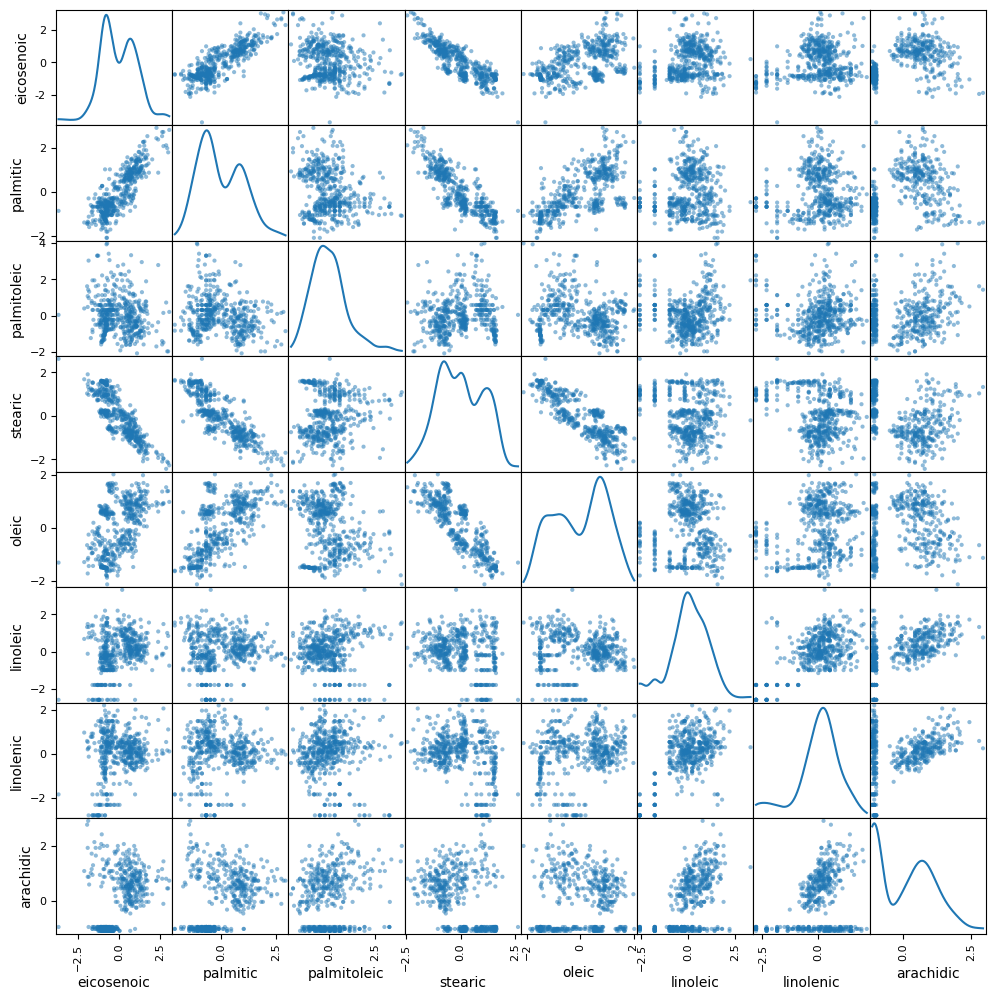

In [6]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(data, figsize=(12,12), diagonal="kde")
plt.show()

In [7]:
import numpy as np
from sklearn import cluster
np.random.seed(0)
kmeans = cluster.KMeans(n_clusters = 3)
kmeans.fit(data)
idk = np.argsort(kmeans.labels_)
# print(pd.DataFrame(data.index[idk],kmeans.labels_[idk]))
# print(kmeans.transform(data))
# print(kmeans.cluster_centers_)


C:\Users\C4-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
from sklearn import metrics
#silhouette 
res = np.arange(9, dtype ="double")
for k in np.arange(9):
    km = cluster.KMeans(n_clusters = k+2)
    km.fit(data)
    res[k] = metrics.silhouette_score(data,km.labels_)
# print (res)



C:\Users\C4-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\C4-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\C4-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\C4-\App

<function matplotlib.pyplot.show(close=None, block=None)>

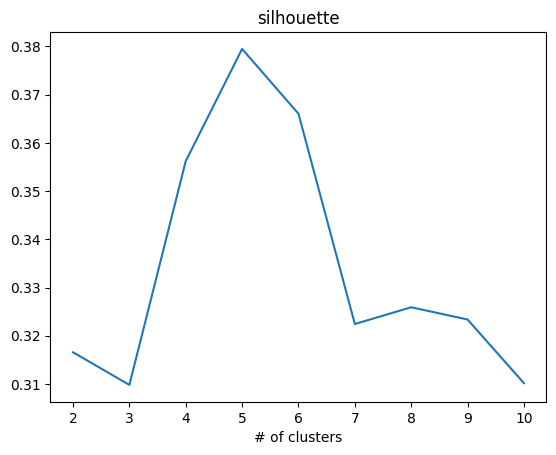

In [9]:
plt.title("silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),(res))
plt.show

In [10]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(data,method='ward', metric='euclidean')


groupes_cah = fcluster(Z, t=3, criterion='maxclust')

# sort groups indexes
idg = np.argsort(groupes_cah)



In [11]:
pd.crosstab(groupes_cah,kmeans.labels_)

col_0,0,1,2
row_0,,,
1,174,0,2
2,13,2,99
3,0,103,101


In [12]:
import pandas as pd

# Create a DataFrame with hierarchical clustering (CAH) and k-means clustering results
cluster_results = pd.DataFrame({'cah': groupes_cah, 'kmeans': kmeans.labels_})

print(cluster_results.head())
print(cluster_results['cah'].unique())


   cah  kmeans
0    2       2
1    2       2
2    2       2
3    2       2
4    2       2
[2 1 3]


In [21]:
data_with_kmeans = data.join(cluster_results['kmeans'])

data_with_kmeans= data_with_kmeans.rename(columns={"kmeans":"class"})
print(data_with_kmeans.head())

data_with_kmeans.to_csv('KNN_data.csv', index=False)

   eicosenoic  palmitic  palmitoleic   stearic     oleic  linoleic  linolenic  \
0   -0.942188 -0.954203    -0.069347  1.217049 -1.222068  0.286817   0.064073   
1   -0.865647 -0.991878    -0.123676  0.943603 -0.778552 -0.111749   0.111567   
2   -1.907782 -1.349789     0.473945  1.912659 -1.722549 -0.111749   0.206556   
3   -1.583955 -1.293277     0.310957  1.526476 -1.437722  1.402803   0.918972   
4   -1.083494 -1.104903     0.827084  1.092319 -1.222068  1.402803   1.013961   

   arachidic  class  
0   0.872009      2  
1   0.872009      2  
2   0.872009      2  
3   1.296728      2  
4   2.075379      2  


In [14]:
# Identify rows with different cluster assignments
diff_rows = cluster_results[(3-cluster_results['cah'])%3 != cluster_results['kmeans']]

# Get the index of the rows with different cluster assignments
diff_rows_index = diff_rows.index
filtered_data = data_with_kmeans.drop(diff_rows_index)


print(filtered_data.shape)

(4, 9)


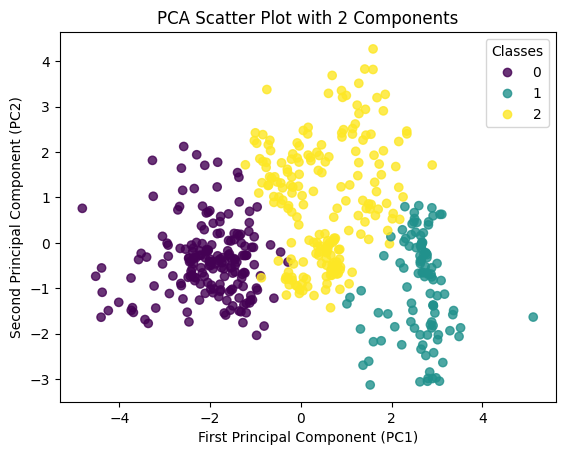

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'data_with_class' is your DataFrame containing the filtered data with the 'class' column

# Separate the features and the class column
features = data_with_kmeans.drop('class', axis=1)
classes = data_with_kmeans['class']

# Remove any non-numeric columns from the features dataset (if any)
numeric_features = features.select_dtypes(include=np.number)

# Perform PCA with 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numeric_features)

# Create a DataFrame with the PCA result
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Create a scatter plot of the PCA result with different colors for different classes
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=classes, cmap='viridis', alpha=0.8)

# Add a legend for the classes
plt.legend(*scatter.legend_elements(), title="Classes")

plt.xlabel('First Principal Component (PC1)')
plt.ylabel('Second Principal Component (PC2)')
plt.title('PCA Scatter Plot with 2 Components')
plt.show()


In [16]:
filtered_data.to_csv('tesssst.csv', index=False)
